In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset

[CMU Book Summary Dataset](http://www.cs.cmu.edu/~dbamman/booksummaries.html)

In [2]:
!wget http://www.cs.cmu.edu/~dbamman/data/booksummaries.tar.gz

--2021-01-15 17:35:50--  http://www.cs.cmu.edu/~dbamman/data/booksummaries.tar.gz
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16795330 (16M) [application/x-gzip]
Saving to: ‘booksummaries.tar.gz’

booksummaries.tar.g 100%[===================>]  16.02M  3.34MB/s    in 5.3s    

2021-01-15 17:35:56 (3.04 MB/s) - ‘booksummaries.tar.gz’ saved [16795330/16795330]



In [3]:
df = pd.read_csv('/content/booksummaries.tar.gz', sep='\t', names=['wiki_id', 'freebase_id', 'title', 'author', 'date', 'genres', 'summary'])[16:-1]
df.sample(10)

,wiki_id,freebase_id,title,author,date,genres,summary
7852,7213629,/m/025wb1p,Magic,William Goldman,1976-08,"{""/m/03npn"": ""Horror"", ""/m/05hgj"": ""Novel""}","The novel concerns a man named Corky Withers,..."
5608,4506275,/m/047gnzf,The Glass Cafe,Gary Paulsen,2003-06-10,"{""/m/03mfnf"": ""Young adult literature"", ""/m/02...","Tony is fascinated with art, and goes to the ..."
2998,1847951,/m/060qp1,Moon Tiger,Penelope Lively,1987,"{""/m/02xlf"": ""Fiction"", ""/m/05hgj"": ""Novel""}","Claudia Hampton, a 76-year-old English woman ..."
12342,17660330,/m/047d94z,Dead Cert,Dick Francis,1962,"{""/m/02n4kr"": ""Mystery"", ""/m/02xlf"": ""Fiction""...",Admiral should have won his race at Maidenhea...
12344,17667350,/m/047g0dg,Dead Sea,Brian Keene,2007,"{""/m/014dfn"": ""Speculative fiction"", ""/m/03npn...","The story follows Lamar Reed, a young black g..."
7691,6983867,/m/0gzx9q,Knight Life,Peter David,NaN,"{""/m/02yq81"": ""Comic novel"", ""/m/014dfn"": ""Spe...",:(The following summary is based on the 2002 ...
15844,30819547,/m/0gfds3l,The Lad and the Lion,Edgar Rice Burroughs,NaN,"{""/m/05hgj"": ""Novel""}",When the king of a small European country is ...
3779,2546056,/m/03m3nsd,Tablet of Destinies,Traci Harding,2001,"{""/m/014dfn"": ""Speculative fiction""}",The second book in The Celestial Triad takes ...
11562,15434217,/m/03m8y7j,Cat among the Pigeons,Julia Golding,2006,"{""/m/0dwly"": ""Children's literature""}",The setting is London in the late 18th centur...
14698,25071241,/m/09gf8xl,Heligoland,Shena Mackay,2003,NaN,"Rowena Snow, a woman of Scottish-Asian parent..."


In [4]:
train, temp = train_test_split(df, train_size = 0.8, random_state = 1)
test, val = train_test_split(temp, train_size = 0.5, random_state = 1)
print(f'Train set volume: {len(train)} \nValidation set volume: {len(val)} \nTest set volume: {len(test)}')

Train set volume: 13247 
Validation set volume: 1656 
Test set volume: 1656


In [5]:
def dataset(dataset):
    texts = dataset['summary'].tolist() # needed texts
    data = ''

    for text in texts:
        
        text = str(text).strip() 
        text = re.sub(r"\s", " ", text)
        start = '<s> '
        end = ' </s>'
        data += start + text + end + '\n' # compile the set 

    return data

def split_set(split_set):
  split_set = dataset(split_set)
  split_set = split_set.split('\n')
  
  return split_set

In [6]:
val_set = split_set(val)
train_set = split_set(train)
test_set = split_set(test)

In [7]:
print(test_set[0][:50], ' ... ', test_set[0][-50:])

<s> Lulu Dark is a sixteen-year-old girl with atti  ...   help of her best friends, Daisy and Charlie. </s>


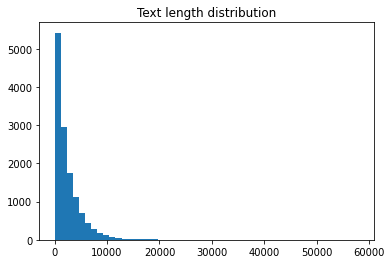

In [8]:
plt.title('Text length distribution')
plt.hist(list(map(len, train_set)), bins=50);